# Task 2 
## Problem Context
 Continuing on the task, a trial was conducted in stores: 77, 86, 88. 
 
 To determine whether they performed well compared to control stores. 
 
 This findings are needed by management team to present to client: the chips manufacturer. 
 
 See task 1 for more additional details.
 



In [756]:
# Approach. 
# 1. To try and understand the case presented.
# 2. To do the analysis as seen best fit, based on know how; intuitive understanding 
    # Own interpertation.
    # Extend with solution template/new ideas from it/not considered. 
# 3. Upload Solution. 
# 4. See solution, provided. 

# Please note a case study is open to interpretation. 
# Also, whilst this task does involve some experimentation and testing. 
# The notion is to compare and analyse based on metrics. 

In [757]:
# -- outline  --
# EDA  
# Picking Control Stores. 
# Comparing Control Stores to trial stores performance.  (vis, analysis.)
# Evaluating Key findings and conclusion. 
# Improvements, limitations, etc.. 

### 1. Setup

In [758]:
#Importing modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as sp 

import os
import re
from collections import namedtuple
from IPython.display import display

# Setting Options 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',10)

def toggle_option(n:str=['all','10'],set_option_str:str=["display.max_columns","display.max_rows"]) -> None:
    print('Set: ', set_option_str, ' to ', n)
    n=None if n == 'all' else int(n)
    pd.set_option(set_option_str,n)
    print('\n')
    

    


In [762]:
# Loading in dataset, processed at the end of task 1. 
data_set_df = pd.read_csv(f"{os.path.join(os.getcwd(),'quantium_dataset_processed_final.csv')}")

In [763]:
data_set_df = data_set_df.drop('Unnamed: 0',axis=1)
#data_set_df = data_set_df.iloc[:,1:]


In [764]:
display(data_set_df.head())
stores = [77,86,88]

,Loyalty_Card_Number,Life_Stage,Card_Subscription,Age_Group,Relationship_Type,Date,Store_Number,Taxation_Id,Product_Number,Product_Name,Product_Quantity,Total_Sales,Product_Price,Product_Weight_Grams,Brand_Name,Product_Price_Per_100_Grams,Year,Month,Tax_Paid
0,1000,Young Singles/Couples,Premium,Young,Singles/Couples,2018-10-17,1,1,5,Natural Chip Company Sea Salt,2,6.0,3.0,175,Natural Chip Company,1.71,2018,10,0.55
1,1002,Young Singles/Couples,Mainstream,Young,Singles/Couples,2018-09-16,1,2,58,Red Rock Deli Chicken and Garlic Aioli,1,2.7,2.7,150,Red Rock,1.80,2018,9,0.25
2,1003,Young Families,Budget,Young,Families,2019-03-07,1,3,52,Grain Waves Sour Cream and Chives,1,3.6,3.6,210,Grain Waves,1.71,2019,3,0.33
3,1003,Young Families,Budget,Young,Families,2019-03-08,1,4,106,Natural Chip Company Honey Soy Chicken,1,3.0,3.0,175,Natural Chip Company,1.71,2019,3,0.27
4,1004,Older Singles/Couples,Mainstream,Older,Singles/Couples,2018-11-02,1,5,96,Woolworths Original Stacked Chips,1,1.9,1.9,160,Woolworths,1.19,2018,11,0.17


### 2. EDA

In [765]:
data_set_df.info()
toggle_option('all','display.max_rows')

# Numeric Columns Summary. 
display((
    data_set_df
        .query(f'Store_Number.isin({stores})')
        .groupby('Store_Number')
        .describe()
        .T
))

# Object Columns list. 
cols_objects = (
    ['Store_Number'] +
    
    list(
        data_set_df
            .select_dtypes('object')
            .columns
        ) 
)

# Object Columns Summary.
display((
    data_set_df[cols_objects]
        .query(f'Store_Number.isin({stores})')
        .groupby('Store_Number')
        .describe()
))


toggle_option(10,'display.max_rows')




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213986 entries, 0 to 213985
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty_Card_Number          213986 non-null  int64  
 1   Life_Stage                   213986 non-null  object 
 2   Card_Subscription            213986 non-null  object 
 3   Age_Group                    213986 non-null  object 
 4   Relationship_Type            213986 non-null  object 
 5   Date                         213986 non-null  object 
 6   Store_Number                 213986 non-null  int64  
 7   Taxation_Id                  213986 non-null  int64  
 8   Product_Number               213986 non-null  int64  
 9   Product_Name                 213986 non-null  object 
 10  Product_Quantity             213986 non-null  int64  
 11  Total_Sales                  213986 non-null  float64
 12  Product_Price                213986 non-null  float64
 13 

Store_Number                                 77             86            88
Loyalty_Card_Number         count  4.710000e+02    1259.000000  1.497000e+03
                            mean   1.585728e+05   87551.044480  1.035363e+05
                            std    4.206750e+05    9833.310412  1.860348e+05
                            min    7.700000e+04   86000.000000  8.800000e+04
                            25%    7.713200e+04   86062.500000  8.809300e+04
                            50%    7.726800e+04   86126.000000  8.818800e+04
                            75%    7.739950e+04   86190.000000  8.828300e+04
                            max    2.330501e+06  155510.000000  2.373711e+06
Taxation_Id                 count  4.710000e+02    1259.000000  1.497000e+03
                            mean   8.101963e+04   86357.654488  8.973612e+04
                            std    3.016587e+04   10014.633283  6.144563e+04
                            min    7.491000e+04   84137.000000  8.622000e+04
                            25%    7.505650e+04   84528.500000  8.668100e+04
                            50%    7.520300e+04   84922.000000  8.715800e+04
                            75%    7.534050e+04   85317.000000  8.763800e+04
                            max    2.367800e+05  155718.000000  2.415841e+06
Product_Number              count  4.710000e+02    1259.000000  1.497000e+03
                            mean   5.596603e+01      56.523431  5.228724e+01
                            std    3.313170e+01      33.844755  3.297289e+01
                            min    1.000000e+00       1.000000  2.000000e+00
                            25%    2.700000e+01      26.000000  2.600000e+01
                            50%    5.800000e+01      58.000000  4.700000e+01
                            75%    8.300000e+01      85.000000  7.800000e+01
                            max    1.140000e+02     114.000000  1.140000e+02
Product_Quantity            count  4.710000e+02    1259.000000  1.497000e+03
                            mean   1.547771e+00       1.988880  1.985304e+00
                            std    5.150401e-01       0.203007  2.095269e-01
                            min    1.000000e+00       1.000000  1.000000e+00
                            25%    1.000000e+00       2.000000  2.000000e+00
                            50%    2.000000e+00       2.000000  2.000000e+00
                            75%    2.000000e+00       2.000000  2.000000e+00
                            max    4.000000e+00       5.000000  5.000000e+00
Total_Sales                 count  4.710000e+02    1259.000000  1.497000e+03
                            mean   5.406157e+00       6.929349  8.680995e+00
                            std    2.431650e+00       2.261652  1.827326e+00
                            min    1.700000e+00       1.900000  3.250000e+00
                            25%    3.400000e+00       5.400000  7.400000e+00
                            50%    5.200000e+00       6.200000  8.400000e+00
                            75%    6.600000e+00       8.800000  9.200000e+00
                            max    1.520000e+01      16.800000  2.280000e+01
Product_Price               count  4.710000e+02    1259.000000  1.497000e+03
                            mean   3.532909e+00       3.487808  4.371677e+00
                            std    1.129526e+00       1.100732  7.937734e-01
                            min    1.700000e+00       1.700000  3.250000e+00
                            25%    2.700000e+00       2.700000  3.700000e+00
                            50%    3.300000e+00       3.300000  4.400000e+00
                            75%    4.400000e+00       4.400000  4.600000e+00
                            max    6.500000e+00       6.500000  6.500000e+00
Product_Weight_Grams        count  4.710000e+02    1259.000000  1.497000e+03
                            mean   1.725350e+02     170.008737  1.750053e+02
                            std    4.801394e+01      47.098220  6.289698e

Life_Stage                                    Card_Subscription  \
                  count unique                    top freq             count   
Store_Number                                                                   
77                  471      7  Young Singles/Couples  127               471   
86                 1259      7         Older Families  286              1259   
88                 1497      7  Older Singles/Couples  381              1497   

                                     Age_Group                     \
             unique         top freq     count unique    top freq   
Store_Number                                                        
77                3  Mainstream  188       471      5  Young  164   
86                3  Mainstream  535      1259      5  Older  538   
88                3      Budget  534      1497      5  Older  679   

             Relationship_Type                               Date         \
                         count unique              top freq count unique   
Store_Number                                                               
77                         471      3  Singles/Couples  245   471    259   
86                        1259      3         Families  561  1259    353   
88                        1497      3  Singles/Couples  673  1497    360   

                              Product_Name         \
                     top freq        count unique   
Store_Number                                        
77            2018-07-17    6          471     91   
86            2018-11-29    9         1259     92   
88            2019-04-20   10         1497     46   

                                                              Brand_Name  \
                                                     top freq      count   
Store_Number                                                               
77                     Smiths Crinkle Cut Snag and Sauce   11        471   
86            Natural Chip Company Tomato Herb and Spice   21       1259   
88                 Cobs Popd Sour Cream and Chives Chips   48       1497   

                                  
             unique     top freq  
Store_Number                      
77               14  Smiths   90  
86               14  Smiths  225  
88                9  Kettle  429

Set:  display.max_rows  to  10




Total Sales Revenue:


Store_Number
77     2546.30
86     8724.05
88    12995.45
Name: Total_Sales, dtype: float64

Total Number of Customers:


Store_Number
77    320.0
86    271.0
88    381.0
dtype: float64

Average number of transactions per customer:


Store_Number
77    1.47
86    4.65
88    3.93
dtype: float64

--- Visualisation EDA ---


<AxesSubplot:xlabel='Store_Number', ylabel='Total'>

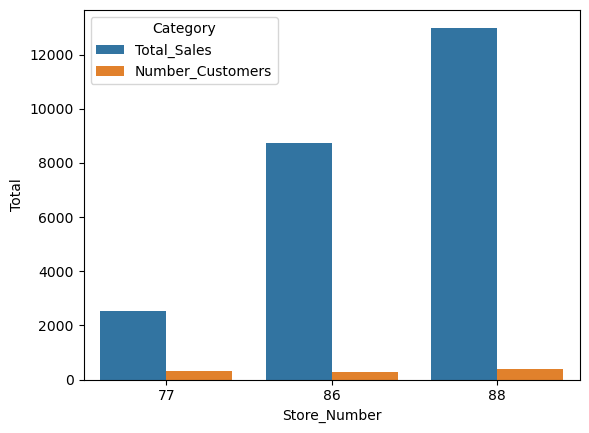

In [766]:
# Understanding the Stores of interest, based on sales experience. 
    #total sales revenue
    #total number of customers
    #average number of transactions per customer

# Total Sales Revenue
print('Total Sales Revenue:')
display((
    data_set_df 
        .query(f'Store_Number.isin({stores})')
        .groupby('Store_Number')
        ['Total_Sales']
        .sum()
))


# Total Number of Customers
print('Total Number of Customers:')

total_cust_df = (data_set_df
        .query(f'Store_Number.isin({stores})')
        .groupby(['Store_Number','Loyalty_Card_Number'])
        .count()
        .iloc[:,0:1]
       )

total_cust_df.iloc[:,0] = 1
total_cust_series = total_cust_df.unstack(1).sum(1)
display(total_cust_series)

# Average number of transactions per customer
print('Average number of transactions per customer:')

transaction_count_series = (
    data_set_df
        .query(f'Store_Number.isin({stores})')
        .groupby('Store_Number')
        ['Loyalty_Card_Number'] 
        .count() 
)

display(round(transaction_count_series.divide(total_cust_series),2))

# Viusualisation.
print('--- Visualisation EDA ---')

total_sales_df = pd.DataFrame( data_set_df 
                                    .query(f'Store_Number.isin({stores})')
                                    .groupby('Store_Number')
                                    ['Total_Sales']
                                    .sum())

total_cust_df = pd.DataFrame(total_cust_series).rename(columns={0:'Number_Customers'})



total_df = (pd
             .merge(left=total_sales_df,right=total_cust_df,on='Store_Number',how='inner')
             .reset_index()
             .melt(['Store_Number'])
             .rename(columns={'value':'Total','variable':'Category'})
           )

display(sns.barplot(data=total_df,x='Store_Number',y='Total',hue='Category'))




### 3. Picking Control Stores

In [767]:
# Ideally some changes are to occur in the trial stores. 
# that will result in more sales, customers or some overall postive trend/improvement for these stores after 
# the experiment has concluded.

# In the scientific method a control group doesn't undergo any alterations. 
# Since, the trial stores may undergo transformations/changes. 
# they need to be compared to a control group, for comparison. 
# The control stores will hence, need to have similar attribute/twin like to the original stores.

# In this particular scenario, the control group chosen is a single store for each trial store,
# that has simlar metrics for sales, etc..

# The method for picking a control store.
# All non trial stores; are all possible control stores.
# To reduce it to 3 possible control stores, 
# A process of elimination needs to be conducted based on some set of rules/metric/etc.. 
# The Metrics: Average number of transactions per customer, Total Sales Revenue, Total Sales per customer,  Brand proportion selection,  Total quantity of product bought,Total Number of Customers

# Experiment/Change is assumed to be some event, process, postulation, theory, etc.. 
# that will help in increasing sales, customer retention, customer transactions, meet business goals, etc..
# and essentially has a positive outcome. 
  # Some examples: 
    # A discount, introduction of a new product
    # new chip brand introduced to consumers, 
    # lighting conditions changes in store, 
    # increase in staff,
    # renovation of store, 
    # placement of products on shelves, 
    # layout of store 
    # furniture used in store 
    # A new sub feature introduced in store: e.g. child care services whilst customer does shopping 
    # staff care more, new processes e.g. hand delivery to car/more convenience to customers. 
    # policy/management changes to store. 
    # filling procedural changes based on conditions/events in daily life. 
    # unrelated e.g. time shifts of crew members. Even something unrelated can have rippling consequences. 
    # etc...
    
# Time period Selected as: Months; 
    # Assumed. 
    # Normal Period: first 6 months 
    # Trial Period: the following 6 months. 
    # Current data is fixed, new data needs to be collected for actual change measurment observation. 
    
        # Selecting a time period. 
                # Since only two years, the months is a suitable time period measurement, to see changes. 
                #print(data_set_df['Month'].unique(), len(data_set_df['Month'].unique())) # 12 months
                #print(data_set_df['Year'].unique(), len(data_set_df['Year'].unique())) # 2 years
    
# Hypothesis 
    # Null, Alternative. Formed to see differences. 
    # Appropriate test conduted. 
    
# Drivers: find reason for that change in metric to occur; assume a reason that can cause that change. 
    # more customers, purchase per customer, more sales, more quantity bought, chip size changes ,transaction per customer, more repeating customers, change in pricing. 
    # can be many, deduce some of them.

In [768]:
# To find the control store that is similar to the trial store. 
    # Pearson's correlation (positive r value, should have a y = x; similar graph.)
    # data_set_df.corr()

# Maybe: 155, 72, 237 # Fine, but not really. 
# Other factors: 
    # Hypothetical control ideal store for all trial stores.    
    # Multiple control stores for a single trial store. 
    # Using, another method for similarty deducing: not pearsn's correlation.

In [769]:
# A store is similar to another store: 
    # Similar number of customers. 
    # Same spending for avg transaction. 
    # Store bring similar Total Sales. 
    # Proportion of customer life stage is similar. (will utilise another dataframe, to look at it separately.)
    # Note that filtering columns reduces the originality of comparison,
        # a fine tuning balance is required between the metrics of interest and the columns chnosen. 
    
def num_cust(s): 
    return len(s.unique())

def avg_transact(s): 
    return sum(s) / num_cust(s)



display(
    data_set_df
            .assign(Cust_Sub = data_set_df['Card_Subscription'])
            .groupby('Store_Number')
            .agg([num_cust,sum,avg_transact])
            [['Loyalty_Card_Number','Product_Number','Product_Quantity', 'Total_Sales','Product_Price','Product_Weight_Grams']] # based on metrics of interest. 
            .T
            .corr()
            .loc[:,stores]
)

# The correlation is too similar for each store. # Hence, this won't be utilised. 
# Another alternative is kept; which looks at more aggregation methods, via the describe method. 

/var/folders/2r/rg0cy7hn56970hbk66__swyr0000gn/T/ipykernel_6195/3994065981.py:18: FutureWarning: ['Life_Stage', 'Card_Subscription', 'Age_Group', 'Relationship_Type', 'Date', 'Product_Name', 'Brand_Name', 'Cust_Sub'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data_set_df


Store_Number,77,86,88
Store_Number,,,
1,0.990533,0.990646,0.990621
2,0.997008,0.997071,0.997057
3,0.998400,0.998446,0.998436
4,0.999134,0.999167,0.999161
5,0.999443,0.999471,0.999464
...,...,...,...
268,1.000000,0.999999,0.999999
269,0.999999,0.999999,0.999998
270,0.999999,0.999999,0.999998


In [770]:
# Assuming similarity with just all numeric columns.
    # This code is usable;  But, if a better measure is present, than that will be utilised. 
    # Still can be utilised.
    
store_determined = namedtuple('store_determined', 'trial_store control_store pearson_correlation')
sorter = lambda df,n:[store_determined(str_nm,df.sort_values(str_nm,ascending=False).index[n + 1],df.sort_values(str_nm,ascending=False).iloc[n+1][str_nm]) for n,str_nm in enumerate(stores)]    
    

display((
    data_set_df
        .groupby('Store_Number')
        .describe()
        .T
        .corr()
        .loc[:,stores]
        .pipe(sorter,1)        
))

[store_determined(trial_store=77, control_store=155, pearson_correlation=0.9236987331755908),
 store_determined(trial_store=86, control_store=71, pearson_correlation=0.9605501073626765),
 store_determined(trial_store=88, control_store=237, pearson_correlation=0.7168592296333446)]

In [771]:
# Proportion of customer life stage is similar. 
# the following dataframe can aid in deducing the similarity of proportion between lifestage proportions. 

# Used for rendering the dataframe as needed. 
#toggle_option('all','display.max_rows')
toggle_option('28','display.max_rows')

cust_prop_creator = lambda df: df.assign(Cust_Prop = df['Count'] / df['Sum'])
def diff_add(df):
    df1 = pd.DataFrame(data=None,columns=['Trial_Store_Number','Control_Store_Number','Life_Stage_Diff_Num'])
    for store_num in stores:
        for col in df.columns:
            df1 = pd.concat((df1,pd.DataFrame(np.array((store_num,col,sum(abs((df[col] - df[store_num]).values)))).reshape(1,3),columns=['Trial_Store_Number','Control_Store_Number','Life_Stage_Diff_Num'])),ignore_index=True)
    return df1



life_stage_prop_diff_df = (
    pd.merge(left=(data_set_df
                .groupby(['Store_Number','Card_Subscription'])
                [['Product_Number']]
                .count()
                .groupby(['Store_Number'])
                .sum()
                .reset_index()
                ),
         right=(data_set_df
                .groupby(['Store_Number','Card_Subscription'])
                [['Product_Number']]
                .count()
                .reset_index()),
         on='Store_Number',
         how='inner',
        ).set_index(['Store_Number','Card_Subscription'])
         .rename(columns={'Product_Number_x':'Sum','Product_Number_y':'Count'})
         .pipe(cust_prop_creator)
         .unstack(1)
         ['Cust_Prop']
         .T
         .fillna(0)  
         .pipe(diff_add)
         .set_index(['Trial_Store_Number','Control_Store_Number'])
         .sort_values('Life_Stage_Diff_Num')
         .query('`Trial_Store_Number` != `Control_Store_Number`')
         .head(10)
)
display(life_stage_prop_diff_df) 
print(life_stage_prop_diff_df.describe())

Set:  display.max_rows  to  28




Life_Stage_Diff_Num
Trial_Store_Number Control_Store_Number                     
77.0               63.0                             0.005696
86.0               251.0                            0.009842
                   6.0                              0.011171
                   130.0                            0.012108
88.0               227.0                            0.012405
                   233.0                            0.012568
                   164.0                            0.014306
77.0               167.0                            0.015491
                   173.0                            0.016031
                   129.0                            0.016204

       Life_Stage_Diff_Num
count            10.000000
mean              0.012582
std               0.003225
min               0.005696
25%               0.011405
50%               0.012487
75%               0.015195
max               0.016204


In [772]:
# The life stage difference amongst the control and trial stores are very similar. 
    # The max difference for proportions of customer subscription type, based on simple arithmetic/logic. 
    # being only 1.48 (approx) for a trial and control store.
    # Hence, whilst there is a minute difference taking that into account, 
    # can be ignored or each proposed control store can be explored with other numeric similarity results. 
    # with the most similar/mimium life stage proporion being for store number 77 trial store and control store 63.
            # being 0.0057 (approx); showcases that again either to ignore this or explore it further. 


In [773]:
# The chosen stores for the control are: 77:155, 86;237, 88:71.  
# Experimentation: Similar stores.  
    # How else could it have been compared ? Transactions occured on similar dates, same number of customers, same sales, same product consumption value count. 



### 4. Comparing Control Stores to Trial Stores Performance

In [774]:
# Time period chosing: 
        # The data presented, is for a financial year worth of data, as showcased below. 
        # The time period chosen is months. The first 6 months are kept as is, the trial store doesnt' undergo any changes that have occured. 
        # The next 6 months is when the changes have occurred.   
    # The reasons behind this time period is described within the following:  
        # Investigate the statistical difference for first 6 months between trial and control store. (prior to trial/pre-trial stage.)
        # Some experiment/change/etc. occurs in trial store. 
        # Observe the stat difference for the next 6 months between trial and control stores ? (after trial stage/post-trial stage.)
        # The 6 months were chosen, as in other industries 
            # E.g. healthcare, it can take upto and even more than 14 months to test the effectivness of an experiment e.g. new drug effectivness.
        # Additionally, this even time period can ensure that both equal time is given for pre and post trial stages.  
        # Hence, this seemed appropriate to evenly split prior to experiment. 
        
data_set_df = (
    data_set_df
            .assign(Date=pd.to_datetime(data_set_df.Date))
            )

print('Financial Year:',
        '\n',
        '\tDate Beginning: ', 
        data_set_df.Date.dt.date.min(),
        '\n',
        '\tDate End:', 
         data_set_df.Date.dt.date.max(),
         "\nTime Difference:", 
        data_set_df.Date.dt.date.max() - data_set_df.Date.dt.date.min()) 



# What defines performance ?. Here is a list that resonates to the notion of performance. 
  # The expansion or elevation of the following: 
    # The quantitiy of sales. 
    # The number of customer transactions.  
    # The number of customer consuming chips. 
    # The average order amount per transaction. 
    # The product quantity purchased. 
    # The consumption of chips weight. 
    # The purchasing behaviour for chips. 
    
  # Musings, that relate.  
    # Life Stage similar, business strategy aligns in a particular way ? 
        #E.g. More younger consumers buying more chips, habit building long term view ? 
    # Movements between stores of a customer,
        # a customer sticks to buying from one store to another store 'adhesive factor'. Average increasing or not. 
    # Does brand proportion performance have an impact on store performance, independently ? 
    # Maybe profit margin is higher: revenue - tax paid. (technically this dataset is just constant prics in chips, hence differences shall remain stagnant. ) 
    # Maybe each time period cumulatively has better performance ? 
    # The comparison factor, for buying chips, what proportion are before a threshold and what proportion after a threshold (e.g. threhsold being mean of product weight per 100 grams)
        # How does this change over time periods ? 
    
    # Segmentation: 
    # What gets a person to buy chips ? # Too many, plausible reason hence segmentation can be done.
        # Group customers by customer type: # E.g. of a customer segmentation could be: Loyal, Impulse, Discount, Need based, Wandering. 
            # See Alteration of a customer type for that store compared to another store. 
            # See key performance indicators for each customer segment. 

    # Randomness: 
        #how random is it ? Is there any reason or no reason for the store to perform well, compared to another ? 
    # Dark data: unknown that could have been utilised.
     

# A statistical test is used to determine if there is a statistical significance, change from the control to the trial store. 

# For the datasets the following can also provide additional granularity of detail.
    # The set of assumptions. (Outside the scope of this task.)
    # Is there an underlying probability distribution that can be utilised ? E.g. Binomial, Possion, Triangular, etc..  
    # The Confidence Interval, chosen; The Sample Size given. (Can influence the standard of error/Margin of error)
    # The Decision making process for Type I (choosing alpha) and Type II (Chossing beta) error.
    # The type of distribution(t/z/etc...). Based on the query type of statistical test: one tailed, two tailed. 
    
    # The framework and algorithm used for conducting a statistical test. 
        # The purpose of the statistical test.  
        # A simple layman idea is used here (neither a framework, nor a concrete algorithm). 
            # This is showcased for each test conducted.  
            # This takes into consideration the above concepts, but not in extreme depth. 
    
    # Related to this context,  
        #A statistical test can be used to compare two datasets based on
            # Central tendency measure (e.g. Mean) and the variablity (e.g. Variance)/both. 
            # A set of assumptions based on distribution of data, probability axioms, etc.. uphold. 
            # Distributions: 
                #The problem statement relating to task 1, doesn't state wheter data collected was for a population, of all chips manufactured. 
                # Whilst, inferring from the text (As taught in english comprehension) this is most likely a population. 
                    # As Dataset of multiple stores is provided, for all the transaction in a financial year. 
                        # The population standard deviation can be hypothesised: research, past chip manufacturing dataset, etc..
                            # but since the scope of this project is to be kept in a boundary, this was decided. 
                        #Hence, z distribution can be used. 
                        #However, since a feasible probability is present that this is a sample, 
                            # the t distribution will be used for the central tendency. 
                            
    # For Central Tendency:  
        # Independent sample t test. 
        # Matched sample t test. 

    # For variability 
        # Chi Square test.  
    # This applies for each question above. Hence, a large number of test. 
        # Combining it with 3 different trial and store pairs, this gives 3n tests. 
        # To adequately deal with this, functions are created. 
    # This is are the test used, currently based on know how. 


# Splitting the dataset. 
    # Into 6 months periods of two. 
        # The time interval can be into 2 periods, of any time length. 
    
splitting_point =(
            pd
            .date_range(start=re.sub('-','/',str(data_set_df.Date.dt.date.min())), 
                        end=re.sub('-','/',str(data_set_df.Date.dt.date.max())))
            .mean()
)

toggle_option('5', 'display.max_rows')  
store_mapper = {77: 155, 86:71, 88:237}
trial_stores_pre_trial_df = data_set_df.query('Date < @splitting_point &  Store_Number in @store_mapper.keys()')
trial_stores_post_trial_df = data_set_df.query('Date > @splitting_point &  Store_Number in @store_mapper.keys()')
control_stores_pre_trial_df = data_set_df.query('Date < @splitting_point & Store_Number in @store_mapper.values()')
control_stores_post_trial_df = data_set_df.query('Date > @splitting_point & Store_Number in @store_mapper.values()')

display(trial_stores_pre_trial_df)
display(trial_stores_post_trial_df)  
display(control_stores_pre_trial_df) 
display(control_stores_post_trial_df)

Financial Year: 
 	Date Beginning:  2018-07-01 
 	Date End: 2019-06-30 
Time Difference: 364 days, 0:00:00
Set:  display.max_rows  to  5




,Loyalty_Card_Number,Life_Stage,Card_Subscription,Age_Group,Relationship_Type,Date,Store_Number,Taxation_Id,Product_Number,Product_Name,Product_Quantity,Total_Sales,Product_Price,Product_Weight_Grams,Brand_Name,Product_Price_Per_100_Grams,Year,Month,Tax_Paid
59130,77000,Midage Singles/Couples,Budget,Midage,Singles/Couples,2018-09-26,77,74910,36,Kettle Chilli,2,10.8,5.4,175,Kettle,3.09,2018,9,0.98
59136,77004,Retirees,Budget,Retirees,Retirees,2018-07-18,77,74918,30,Doritos Corn Chips Cheese Supreme,1,4.4,4.4,170,Doritos,2.59,2018,7,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213984,2370961,Older Families,Budget,Older,Families,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted,2,8.4,4.2,165,Tyrrells,2.55,2018,10,0.76
213985,2373711,Young Singles/Couples,Mainstream,Young,Singles/Couples,2018-12-14,88,241815,16,Smiths Crinkle Chips Salt and Vinegar,2,11.4,5.7,330,Smiths,1.73,2018,12,1.04


,Loyalty_Card_Number,Life_Stage,Card_Subscription,Age_Group,Relationship_Type,Date,Store_Number,Taxation_Id,Product_Number,Product_Name,Product_Quantity,Total_Sales,Product_Price,Product_Weight_Grams,Brand_Name,Product_Price_Per_100_Grams,Year,Month,Tax_Paid
59129,77000,Midage Singles/Couples,Budget,Midage,Singles/Couples,2019-04-13,77,74912,69,Smiths Chips Thinly Sour Cream and Onion,1,3.0,3.0,175,Smiths,1.71,2019,4,0.27
59131,77001,Young Families,Mainstream,Young,Families,2019-02-27,77,74913,7,Smiths Crinkle Original,2,11.4,5.7,330,Smiths,1.73,2019,2,1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213971,2330291,Older Singles/Couples,Mainstream,Older,Singles/Couples,2019-06-18,77,236754,83,Woolworths Deli Style Chips Sea Salt,1,1.9,1.9,200,Woolworths,0.95,2019,6,0.17
213975,2330501,Older Singles/Couples,Budget,Older,Singles/Couples,2019-06-20,77,236780,63,Kettle Sweet Pot Sea Salt,1,4.2,4.2,135,Kettle,3.11,2019,6,0.38


,Loyalty_Card_Number,Life_Stage,Card_Subscription,Age_Group,Relationship_Type,Date,Store_Number,Taxation_Id,Product_Number,Product_Name,Product_Quantity,Total_Sales,Product_Price,Product_Weight_Grams,Brand_Name,Product_Price_Per_100_Grams,Year,Month,Tax_Paid
54405,71000,Young Families,Budget,Young,Families,2018-09-14,71,68880,61,Smiths Crinkle Cut Chips Chicken,2,5.8,2.9,170,Smiths,1.71,2018,9,0.53
54406,71000,Young Families,Budget,Young,Families,2018-09-21,71,68881,75,Cobs Popd Sea Salt Chips,2,7.6,3.8,110,Cobs,3.45,2018,9,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213956,880711,Older Families,Budget,Older,Families,2018-09-15,237,86567,3,Kettle Sensations Camembert and Fig,2,9.2,4.6,150,Kettle,3.07,2018,9,0.84
213957,883791,Older Singles/Couples,Mainstream,Older,Singles/Couples,2018-09-29,237,88100,33,Cobs Popd Sweet Chilli and Sour Cream Chips,2,7.6,3.8,110,Cobs,3.45,2018,9,0.69


,Loyalty_Card_Number,Life_Stage,Card_Subscription,Age_Group,Relationship_Type,Date,Store_Number,Taxation_Id,Product_Number,Product_Name,Product_Quantity,Total_Sales,Product_Price,Product_Weight_Grams,Brand_Name,Product_Price_Per_100_Grams,Year,Month,Tax_Paid
54409,71000,Young Families,Budget,Young,Families,2019-01-03,71,68886,64,Red Rock Deli Sr Salsa and Mozzarella,2,5.4,2.7,150,Red Rock,1.80,2019,1,0.49
54410,71000,Young Families,Budget,Young,Families,2019-03-25,71,68887,60,Kettle Tortilla Chips Feta and Garlic,2,9.2,4.6,150,Kettle,3.07,2019,3,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213953,862501,Young Families,Budget,Young,Families,2019-06-28,155,85678,16,Smiths Crinkle Chips Salt and Vinegar,2,11.4,5.7,330,Smiths,1.73,2019,6,1.04
213958,883791,Older Singles/Couples,Mainstream,Older,Singles/Couples,2019-06-29,237,88103,68,Pringles Chicken Salt Crisps,2,7.4,3.7,134,Pringles,2.76,2019,6,0.67


In [860]:
# There are many approaches to utilise. 
# however, a scaling whilst considered, wasn't performed amongst the contorl and the trial dataset.

# Statistical Test # As previously mentioned not a concrete algorithm for a statisical test or some guiding framework. 
# Helpful steps in a statistical test. 
# Step 1: Make Null and alternative hypothesis
# Step 2: Select distribution, statistical test, sample statistc formula
# Step 3: Select alpha value. 
# Step 4: Define a selection rule based on hypothesis test.
# Step 5: Express data presented/write it in formal words.  
# Step 6: Calculate the statistic of interest. 
# Step 7: Interpret the notion with a normal distribution/usually includes finding critical regions or p value. (rejection and non rejection region); 
# Step 8: Conclude to fail to reject or rejection of the null hypothesis. 

# Is there a statistically significant change in the quantity of chips consumed by customers. 
# Post trial stage compare that to control post stage. 

# Based on logic. The contorl stores didn't undergo changes. So post control store is the same 
# The problem is they also assume that the customers can't move between stores. Like. It's true they can move between store. 
# A customer can buy bread in store A (eg. Coles Footscray) and than also buy bread in Store B(e.g. Coles Clayton)
# THe thing  is this assumption isn't taken care of by the wya they did this.   

In [776]:
# Is it an 'independent' t - test ? 

# Not independent if: 
    # Same Customer buys chips from the contol store and the trial store.
        # A further explantion is the following: 
            # If a clinical trial was conducted with the same patient being in the control and the trial test. 
                # This is weakly mutually exclusive. 
                # As this a flaw in the study design. 
                
# If there is even a single customer that purchased between stores. 
# This can't be independent. 
    # For Stores 88 and 237 the independent T test cann't be done.
        # As the data collected depends on each other. 
    # As it's okay to do an independent T test for the other 2 paris of stores, they will be utilised on those two pairs. 
        # What happens with 88 and 237 ? 
            # The dependent data (same customer) is removed. Allowing for Independent T test to be carried out. 
        
toggle_option('10','display.max_rows')

for k,v in store_mapper.items():
    t1 = (
        data_set_df
            .query(f'Store_Number == {k}') 
    
    )

    t2 = (
        data_set_df
            .query(f'Store_Number == {v}')
    )
    
    print(f'-- Trial store: {k} Control Store: {v} --')

    out = []
    for x in t1.Loyalty_Card_Number.unique(): 
        if x in t2.Loyalty_Card_Number.unique():
            out.append(x)
    print(out)
    

Set:  display.max_rows  to  10


-- Trial store: 77 Control Store: 155 --
[]
-- Trial store: 86 Control Store: 71 --
[]
-- Trial store: 88 Control Store: 237 --
[237324]


In [777]:

for data_frame in [control_stores_pre_trial_df, control_stores_post_trial_df, trial_stores_pre_trial_df, trial_stores_post_trial_df]: 
    (data_frame
         .query("Store_Number in list(@store_mapper.items())[-1] & Loyalty_Card_Number == 237324")
         .pipe(lambda df: display(df) or df)
         .pipe(lambda df: print(df.index) or df) 
        # .pipe(lambda df: df.drop(list(df.index)))
    )

control_stores_pre_trial_df = (control_stores_pre_trial_df 
         .drop([191257])
    )


control_stores_post_trial_df = (control_stores_post_trial_df 
         .drop([191259])
    )


trial_stores_pre_trial_df = (trial_stores_pre_trial_df
         .drop([191258])
    )


print('\n-- For Independent T Test to be plausible, the dependent data values were removed.--\n') 

for data_frame in [control_stores_pre_trial_df, control_stores_post_trial_df, trial_stores_pre_trial_df, trial_stores_post_trial_df]: 
    (data_frame
         .query("Store_Number in list(@store_mapper.items())[-1] & Loyalty_Card_Number == 237324")
         .pipe(lambda df: display(df) or df)
    )


,Loyalty_Card_Number,Life_Stage,Card_Subscription,Age_Group,Relationship_Type,Date,Store_Number,Taxation_Id,Product_Number,Product_Name,Product_Quantity,Total_Sales,Product_Price,Product_Weight_Grams,Brand_Name,Product_Price_Per_100_Grams,Year,Month,Tax_Paid
191257,237324,Midage Singles/Couples,Mainstream,Midage,Singles/Couples,2018-09-19,237,241581,32,Kettle Sea Salt and Vinegar,2,10.8,5.4,175,Kettle,3.09,2018,9,0.98


Int64Index([191257], dtype='int64')


,Loyalty_Card_Number,Life_Stage,Card_Subscription,Age_Group,Relationship_Type,Date,Store_Number,Taxation_Id,Product_Number,Product_Name,Product_Quantity,Total_Sales,Product_Price,Product_Weight_Grams,Brand_Name,Product_Price_Per_100_Grams,Year,Month,Tax_Paid
191259,237324,Midage Singles/Couples,Mainstream,Midage,Singles/Couples,2019-02-18,237,241586,78,Thins Chips Salt and Vinegar,2,6.6,3.3,175,Thins,1.89,2019,2,0.6


Int64Index([191259], dtype='int64')


,Loyalty_Card_Number,Life_Stage,Card_Subscription,Age_Group,Relationship_Type,Date,Store_Number,Taxation_Id,Product_Number,Product_Name,Product_Quantity,Total_Sales,Product_Price,Product_Weight_Grams,Brand_Name,Product_Price_Per_100_Grams,Year,Month,Tax_Paid
191258,237324,Midage Singles/Couples,Mainstream,Midage,Singles/Couples,2018-12-20,88,2415841,102,Kettle Mozzarella Basil and Pesto,2,10.8,5.4,175,Kettle,3.09,2018,12,0.98


Int64Index([191258], dtype='int64')


,Loyalty_Card_Number,Life_Stage,Card_Subscription,Age_Group,Relationship_Type,Date,Store_Number,Taxation_Id,Product_Number,Product_Name,Product_Quantity,Total_Sales,Product_Price,Product_Weight_Grams,Brand_Name,Product_Price_Per_100_Grams,Year,Month,Tax_Paid


Int64Index([], dtype='int64')

-- For Independent T Test to be plausible, the dependent data values were removed.--



,Loyalty_Card_Number,Life_Stage,Card_Subscription,Age_Group,Relationship_Type,Date,Store_Number,Taxation_Id,Product_Number,Product_Name,Product_Quantity,Total_Sales,Product_Price,Product_Weight_Grams,Brand_Name,Product_Price_Per_100_Grams,Year,Month,Tax_Paid


,Loyalty_Card_Number,Life_Stage,Card_Subscription,Age_Group,Relationship_Type,Date,Store_Number,Taxation_Id,Product_Number,Product_Name,Product_Quantity,Total_Sales,Product_Price,Product_Weight_Grams,Brand_Name,Product_Price_Per_100_Grams,Year,Month,Tax_Paid


,Loyalty_Card_Number,Life_Stage,Card_Subscription,Age_Group,Relationship_Type,Date,Store_Number,Taxation_Id,Product_Number,Product_Name,Product_Quantity,Total_Sales,Product_Price,Product_Weight_Grams,Brand_Name,Product_Price_Per_100_Grams,Year,Month,Tax_Paid


,Loyalty_Card_Number,Life_Stage,Card_Subscription,Age_Group,Relationship_Type,Date,Store_Number,Taxation_Id,Product_Number,Product_Name,Product_Quantity,Total_Sales,Product_Price,Product_Weight_Grams,Brand_Name,Product_Price_Per_100_Grams,Year,Month,Tax_Paid


In [854]:
# As the operations to be performed are similar for the trial store and accompanying, control store. 
# A function is made that can be utilised on other control and trail store pairs. 

###
# Question 1:  Does sales improve, or are greater in the post trial stage compared to the post control store ? 
###

 
# Step 7: Interpret the notion with a normal distribution/usually includes finding critical regions or p value. (rejection and non rejection region); 
# Step 8: Conclude to fail to reject or rejection of the null hypothesis. 

# Step 1: Make null and alternative hypothesis
    # Self explanatory, when conducting a classical hypothesis test . 
    # H0: total_sales_mean_post_control - total_sales_mean_post_trial <= 0    
    # H1: total_sales_mean_post_control - total_sales_mean_post_trial > 0 
    
print('-- For each step, please refer to the, comments. -- ')

print()
print('Step 1:')
print('H0: total_sales_mean_post_control - total_sales_mean_post_trial <= 0 ')
print('H1: total_sales_mean_post_control - total_sales_mean_post_trial > 0  ')
print()
# Step 2: Select distribution, statistical test, sample statistic formula.
    # Distribution: t (explained above)
    # Statistical Test: one sided. 
    # Sample Statistical Formula: x_diff - hypth_popu_mean_diff/sqrt(variance_sample_1/squared standard error + variance_sample_2/squared standard error)
    # 
print('Step 2:')
print('Distribution: T test', 'Statistical Test: One Sided', 'Sample Statistical Formula:\n (sample_mean_difference -  hypth_population_mean_diff)/sqrt(variance_sample_1 + variance_sample_2)')
print()
# Step 3: Select an alpha value .
    
    # Probablity density function from right hand side. 
    # A decision of the alpha value needs to be made based on:
        # The alpha value determines the type I error, reducing it increases type II error; vice versa. 
            # Trading off between these two
            # rejecting the null and supporting the alternative when the null was true (type I)
            # failing to reject the null and rejecting the alternative hypothesis. when the alternative was true (type II)
    
        # The likelihood of a value falling 2 to 3 stdv is a good estimate. 
            # due to std error of the sampling mean difference distribution, sample size and confidence intervals chosen/wanted. 
    
      # Context of the problem. 
            # Here, the typical 0.05 value is chosen. 
    # 0.05 (approximate) 
print('Step 3:')
print('Alpha Value: 0.05')
print()

# Step 4: Define a selection rule based on hypothesis test.  
    # Using calculus. 
    # or using a t-value table(df, alpha value), 
        # the critical t value, and using the formula the critical sample mean difference can also be worked out. 
        # or a p value.
    # If p_value is less than or eqaul 0.05 to than reject null hypothesis. 
     # If p
crit_t_value_from_t_table = 1.66449
print('Step 4:')
print('Using a t-table, other alternatives could be taken.')
print(f'For: df = {len(control_stores_post_trial_df) + len(trial_stores_post_trial_df) - 2}, Sufficiently large(Limit approaching Infinity: on t table); One sided \
                  \nCritical t value = {crit_t_value_from_t_table}(greater than)')
print('')
#Step 5: Express data in formal words. 

    # For post_control sample 
       # Sample mean(symbol x bar in output capital x ): mean(control_stores_post_trial_df); 
        # sample Standard deviation (symbol s) = stdv(control_stores_post_trial_df)
        # Size of sample (n) = len(control_stores_post_trial_df)  
    # For post_trial sample
        # Sample mean(symbol x bar in output capital x ): mean(trial_stores_post_trial_df); 
        # sample Standard deviation (symbol s) = stdv(trial_stores_post_trial_df)
        # Size of sample (n) = len(trial_stores_post_trial_df)  
        
print('Step 5:') 
print('Control Stores Post Trial (Sample 1).')
print(f'\tSample Mean(X): {control_stores_post_trial_df.Total_Sales.mean()}')
print(f'\tSample Standard Deviation(s): {control_stores_post_trial_df.Total_Sales.std()}') # By default uses n - 1 (for calculating the sample standard deviation)
print(f'\tSample Size(n): {len(control_stores_post_trial_df)}')
print('Trial Stores Post Trial (Sample 2).')
print(f'\tSample Mean(X): {trial_stores_post_trial_df.Total_Sales.mean()}')
print(f'\tSample Standard Deviation(s): {trial_stores_post_trial_df.Total_Sales.std()}') # By default uses n - 1 (for calculating the sample standard deviation)
print(f'\tSample Size(n): {len(trial_stores_post_trial_df)}')

# Step 6: Calculate Statistic of interest. 
    # Using the Formula for the t statistic: 
         #(sample_mean_difference -  hypth_population_mean_diff)/sqrt(variance_sample_1 + variance_sample_2)
         #the t value is calculated
         #it helps to imagine a normal distribution 
            #with a right sided shaded region being the rejection region(based upon the alpha value) 
            # and the left region being the failt to rejection region. 
        # Imagine where that t value resides in the distribution, intuitively. 
         

variance1 = 2.3922341457622185 ** 2
variance2 = 2.3816451813891444 ** 2 
t_value = ((7.512884518406377 - 7.509774665042578) + (0 - 0))/((variance1 + variance2) ** 0.5)

print('Step 6:')
print('t value:',t_value)
print()

# Step 7: Interpret the notion with a normal distribution/usually includes finding critical regions or p value. (rejection and non rejection region); 
    # Theory needs to be understood, for proper interpretation of the t value evalutated.  
    
print('Step 7:')
print('A t value close to 0 means that there is very little standard deviation from the mean sample difference distribution.')
print()

print('Step 8:')
print('As in earlier steps a decision rule was defined to help reject or fail to reject the null hypothesis.')
print('This now comes into fruition.')
print('Since the t value is: ',round(t_value,5),'which is less than the critical t value of a (right tailed test) of:',round(crit_t_value_from_t_table,2))
print('Hence, a failure to reject the null hypothesis, as the total sales sample mean differnece is very similar.')
print('\nThis, concludes the sample t test for total sales(improvements, See comments)')


# Scipy could have been used, but it was best to show the process of doign a statistical test: 

#sp.stats.ttest_ind(a=control_stores_post_trial_df.Total_Sales,
#                   b=trial_stores_post_trial_df.Total_Sales,
#                  nan_policy='raise',
#                 alternative='greater')





-- For each step, please refer to the, comments. -- 

Step 1:
H0: total_sales_mean_post_control - total_sales_mean_post_trial <= 0 
H1: total_sales_mean_post_control - total_sales_mean_post_trial > 0  

Step 2:
Distribution: T test Statistical Test: One Sided Sample Statistical Formula:
 (sample_mean_difference -  hypth_population_mean_diff)/sqrt(variance_sample_1 + variance_sample_2)

Step 3:
Alpha Value: 0.05

Step 4:
Using a t-table, other alternatives could be taken.
For: df = 3623, Sufficiently large(Limit approaching Infinity: on t table); One sided                   
Critical t value = 1.66449(greater than)

Step 5:
Control Stores Post Trial (Sample 1).
	Sample Mean(X): 7.512884518406377
	Sample Standard Deviation(s): 2.3922341457622185
	Sample Size(n): 1983
Trial Stores Post Trial (Sample 2).
	Sample Mean(X): 7.509774665042578
	Sample Standard Deviation(s): 2.3816451813891444
	Sample Size(n): 1642
Step 6:
t value: 0.0009212604013796538

Step 7:
A t value close to 0 means that t

In [ ]:
# Note a similar procedure can be followed for different stores pairs; with a functiion made to easily parse the data. 
# Slight deviations will occur in new tests e.g. chi squared for the test of variability. 
# But the overall process will be the same. 

In [ ]:
# Improvements. 
    # Learning Statistical Tests.  
    # A better use of steps, suitable knowdlege. 
    # More implementation of different tests. 
# Make conclusions.

In [859]:
# Side note/challenge 
 # make a function that interpetes parameters in any order of input. 
    # n parameters. 
        # n! ways of having parameters rearranged. 
        # Some software magic allowing for same name too ? 
            # Not the same type of parameter, e.g. *args could be used; if func parameter is repeated. 
        # bad programming practice, the vision of a programming language, breakign that idea of ordering. 
            # The user can specify the function parameter order as a programmer themselves. 
            # Hence, a different idea was used. 
        # Changed from can this be done, to not done, but just try it anyway. 
        
def the_function(b, a, c): 
        pass

# Easy: Chooser 
# 1 make a rearranger function. -> parameter rerranger. 

# Modules: math, itertools, inspect etc. can be used. But the aim was to do this without the use of modules. 
# Combining these two and doing more addition of logic can help form the rearranger a component of the chooser. 
    # However, no modules were used in the making of the chooser. 
    #math.factorial(3)
    #list(itertools.permutations('abc'))

def recur_fact(n):
    if n == 0 or n == 1: 
        return 1
    return recur_fact(n-1) * n 

def rearranger(iter_like):
    a_list = list(iter_like) # Memory usage increases. # Could be improved. 
    len_list = len(a_list)
    n = recur_fact(len_list)
    idx2,idx1 = len_list - 1, len_list - 2
    out = {}
    while n >= 1:
        out[n] = a_list[:]
        print(a_list,n)
        a_list[idx2],a_list[idx1] = a_list[idx1],a_list[idx2]
        idx2 -= 1
        idx1 -= 1 
        n -= 1
        if idx1 == -1:
            idx2,idx1 = len_list - 1, len_list - 2
    return out

def chooser(func_name:str,*func_parameters) -> None : 
    choices = rearranger(func_parameters)
    captured_out = input('\nWhich parameter order would you prefer ? ')
    try: 
        captured_out = int(captured_out)
        if captured_out not in choices:
            raise
    except:
        return print('The Input should be an integer, given from the output option.')
    print('\nHere is the function:')
    print('def '+ func_name+ str(tuple(choices[captured_out])) + ':' + '\n\tpass') 
    
    
chooser('normalised_value','data_value', 'population_mean', 'population_stdv')           
#rearranger(['data_value','population_mean','population_stdv','out_message'])


['data_value', 'population_mean', 'population_stdv'] 6
['data_value', 'population_stdv', 'population_mean'] 5
['population_stdv', 'data_value', 'population_mean'] 4
['population_stdv', 'population_mean', 'data_value'] 3
['population_mean', 'population_stdv', 'data_value'] 2
['population_mean', 'data_value', 'population_stdv'] 1

Which parameter order would you prefer ? 3

Here is the function:
def normalised_value('population_stdv', 'population_mean', 'data_value'):
	pass


In [861]:
# Improvement 
# More Tests. 